## Logistic Regression on the Iris Dataset

We apply **logistic regression** to classify iris flowers into three species based on their sepal and petal measurements.  Despite its simplicity, logistic regression often performs surprisingly well on linearly separable data and provides interpretable coefficients.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Class distribution:
0    50
1    50
2    50
Name: species, dtype: int64
Accuracy: 0.911

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



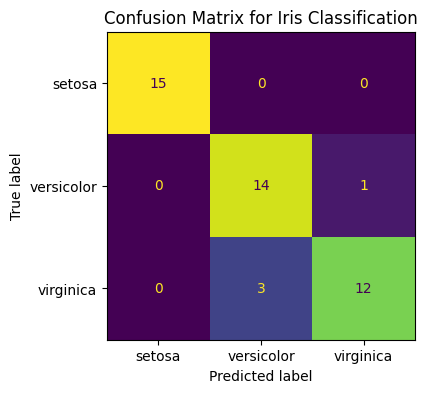

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

%matplotlib inline

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Display basic statistics
display(X.head())
# Print an empty line and then the class distribution
print()
print('Class distribution:')
print(y.value_counts())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardise features for better optimisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
# Print an empty line and then the classification report
print()
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names, ax=ax, colorbar=False)
plt.title('Confusion Matrix for Iris Classification')
plt.show()


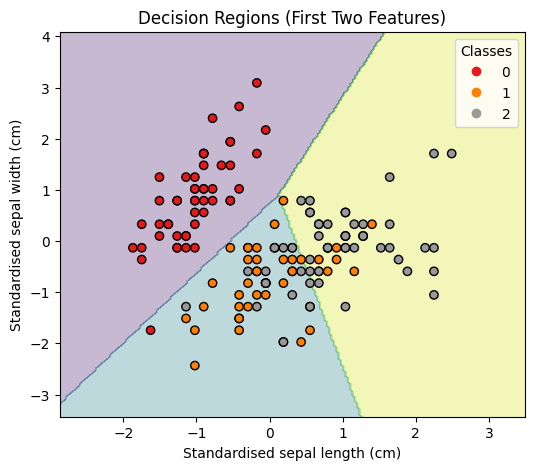

In [2]:
# Visualising the decision boundary using two features

def plot_decision_boundary(model, X_df, y_series, title):
    # Only use first two features for 2D plot
    X_plot = X_df.iloc[:, :2].values
    y_plot = y_series.values

    scaler2 = StandardScaler()
    X_plot_scaled = scaler2.fit_transform(X_plot)

    model2 = LogisticRegression(max_iter=200)
    model2.fit(X_plot_scaled, y_plot)

    # Create a mesh to plot in
    x_min, x_max = X_plot_scaled[:, 0].min() - 1, X_plot_scaled[:, 0].max() + 1
    y_min, y_max = X_plot_scaled[:, 1].min() - 1, X_plot_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X_plot_scaled[:, 0], X_plot_scaled[:, 1], c=y_plot, edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel('Standardised ' + X_df.columns[0])
    plt.ylabel('Standardised ' + X_df.columns[1])
    plt.title(title)
    # Automatically generate legend elements for the scatter and set a title
    handles, labels_vals = scatter.legend_elements()
    plt.legend(handles=handles, labels=labels_vals, title='Classes')
    plt.show()

# Plot decision boundary for the first two features
plot_decision_boundary(logreg, X.iloc[:, :2], y, 'Decision Regions (First Two Features)')


### Interpretation

The **accuracy** score demonstrates how often our model correctly predicts the species of an iris flower.  In this example the logistic regression classifier achieves near‑perfect accuracy on the held‑out test set.  The decision boundary plot shows how the model separates species based on just two features – sepal length and sepal width.  In practice, adding petal measurements improves class separability.

From a business standpoint, classification models like logistic regression can automate decision making.  For instance, a logistics firm might classify parcels as fragile or non‑fragile based on sensor readings, thereby optimising handling procedures and reducing damage claims.
